In [1]:
# Import useful modules

import numpy as np
import pandas as pd
import scanpy as sc
import os
#import igraph
import matplotlib.pyplot as plt
import seaborn

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()


scanpy==1.4+39.gc70f24b anndata==0.6.18 numpy==1.16.2 scipy==1.2.1 pandas==0.24.1 scikit-learn==0.20.3 statsmodels==0.9.0 python-igraph==0.7.1 


In [2]:
sc.settings.set_figure_params(dpi=130)

In [3]:
adata_ann = sc.read_h5ad('/Data/Annotated_dataset_v1.h5ad')

In [4]:
metadata = pd.read_csv('/Data/Annotated_dataset_metadata.tsv', sep = '\t')


In [5]:
adata_ann.obs['CellType.Corrected'] = metadata['CellType.Corrected']

In [6]:
adata_ann.obs['CellType.Corrected_rare'] = metadata['CellType.Corrected_rare']

***
***
## Analysis of bronchial cells

In [24]:
cellsid = pd.read_csv('/Data/PAGA_subset_Bronchial.txt', sep = '\t')


In [25]:
adata = adata_ann[cellsid['x'], ]
adata.shape

(2725, 18417)

In [26]:
sc.pp.filter_genes(adata, min_cells=10)
adata.X.shape

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


filtered out 2617 genes that are detected in less than 10 cells


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


(2725, 15800)

In [27]:
sc.tl.pca(adata, svd_solver='arpack')

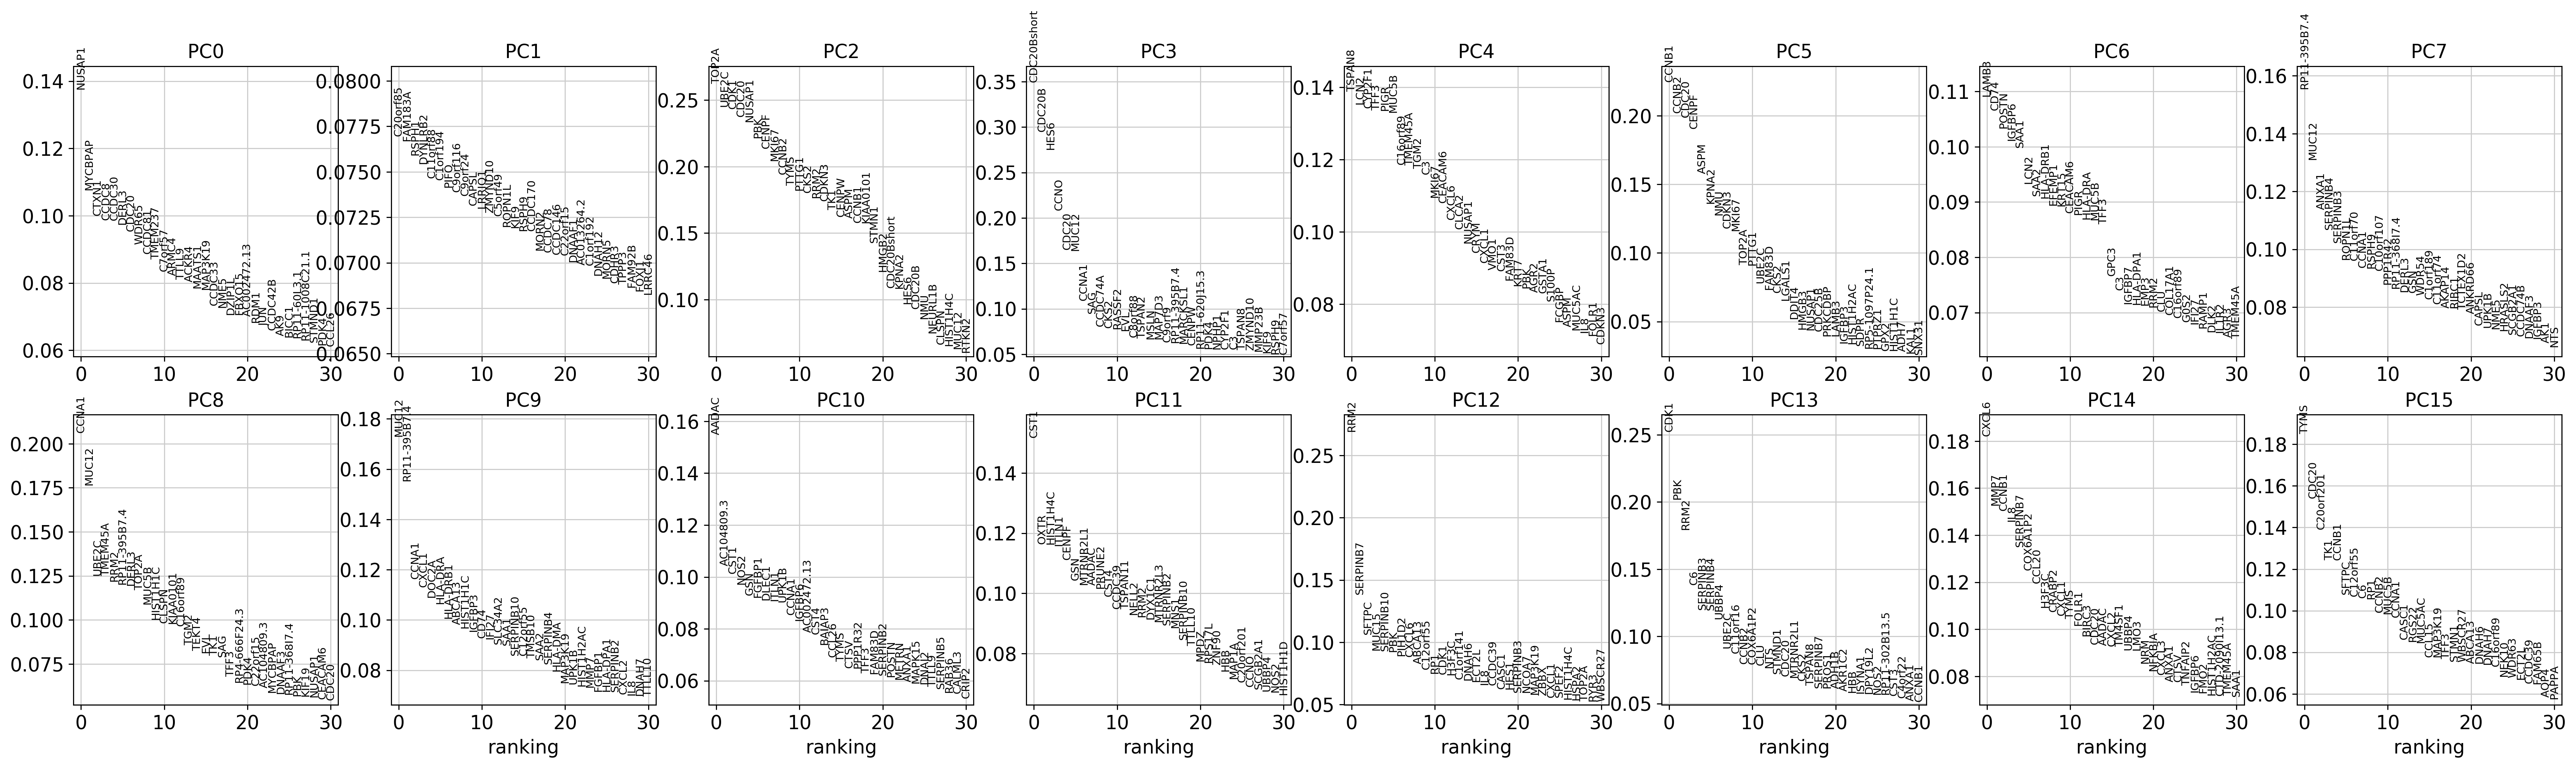

In [28]:
sc.pl.pca_loadings(adata, components=list(range(0,16)))

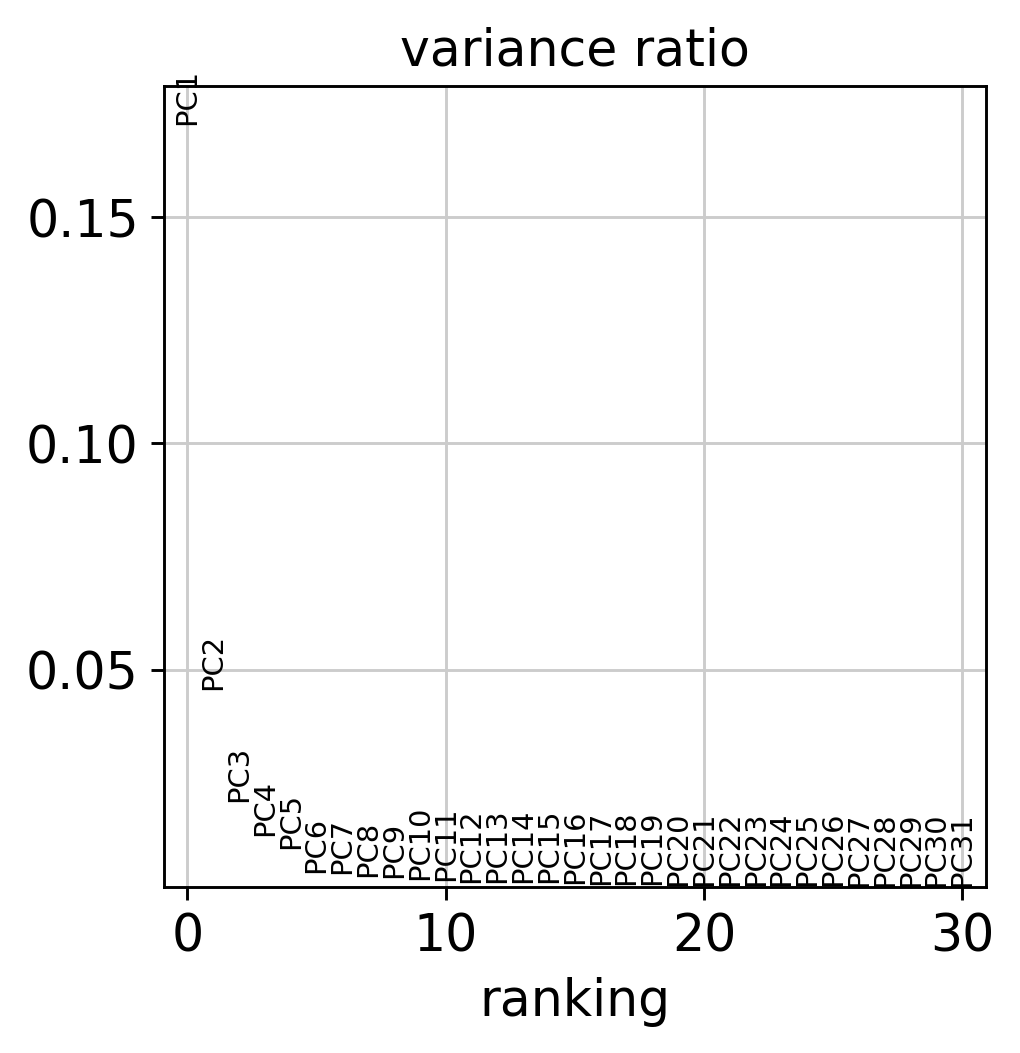

In [29]:
sc.pl.pca_variance_ratio(adata, log = False)

In [30]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=6)

computing neighbors
    using 'X_pca' with n_pcs = 6
    finished (0:00:00.39) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [31]:
sc.tl.umap(adata)

computing UMAP
    finished (0:00:05.43) --> added
    'X_umap', UMAP coordinates (adata.obsm)


... storing 'name' as categorical
... storing 'CellType.Corrected' as categorical
... storing 'CellType.Corrected_rare' as categorical


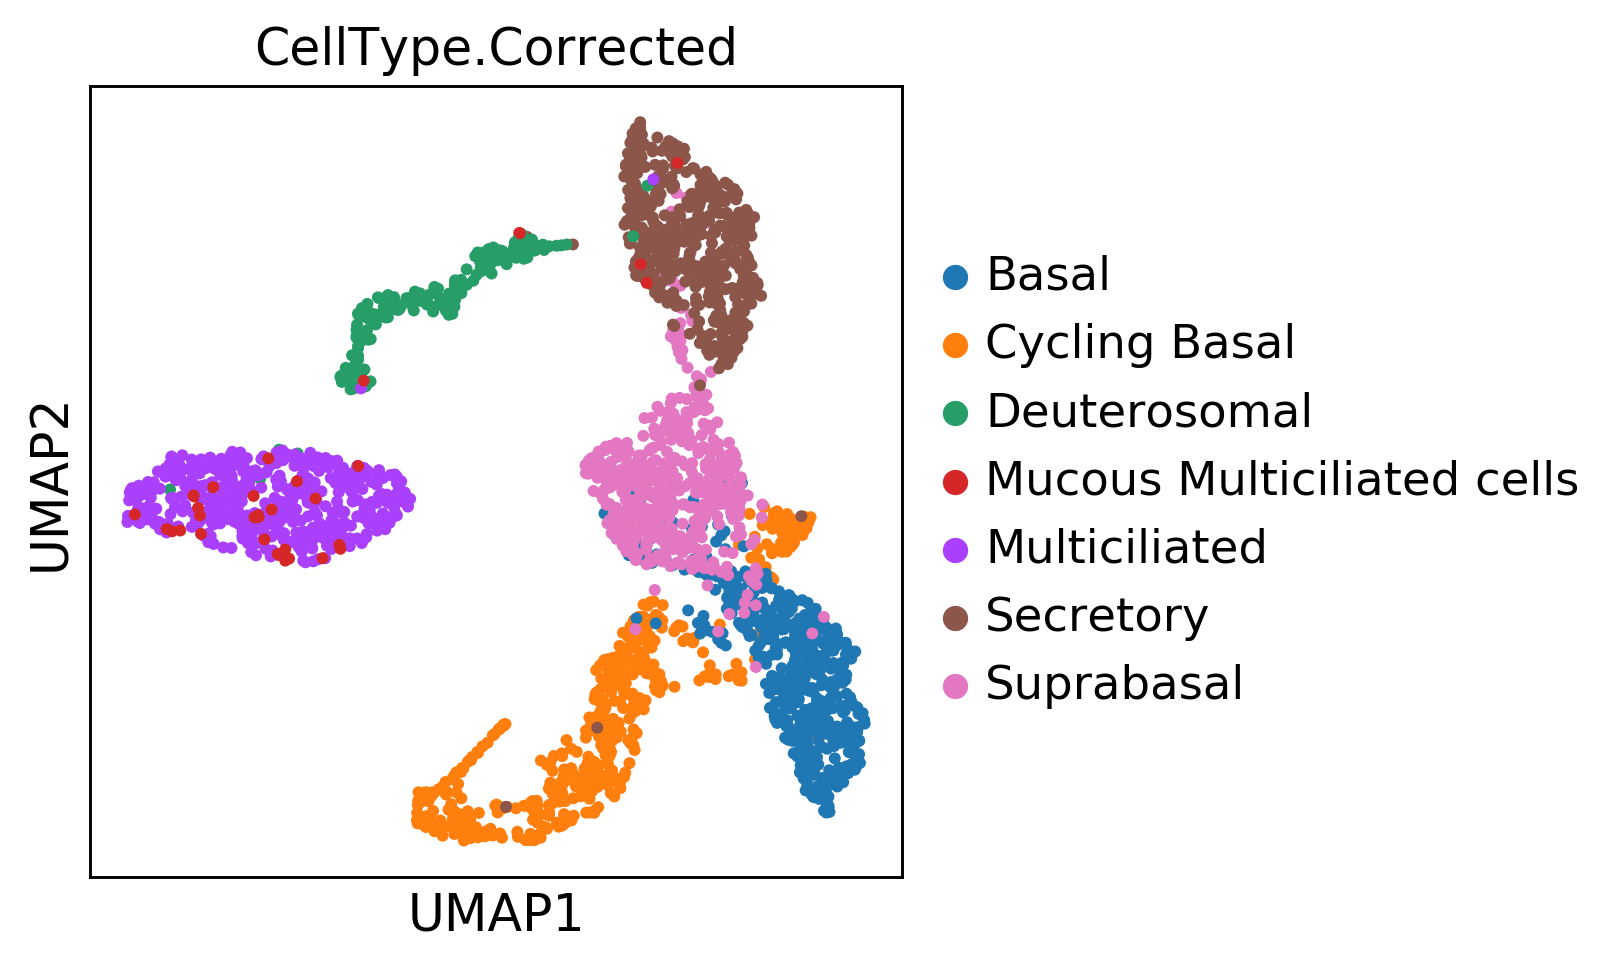

In [32]:
sc.pl.umap(adata, color=['CellType.Corrected'], edges = False)

In [33]:
sc.tl.paga(adata, groups='CellType.Corrected_rare')

running PAGA
    finished (0:00:00.05) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)


--> added 'pos', the PAGA positions (adata.uns['paga'])


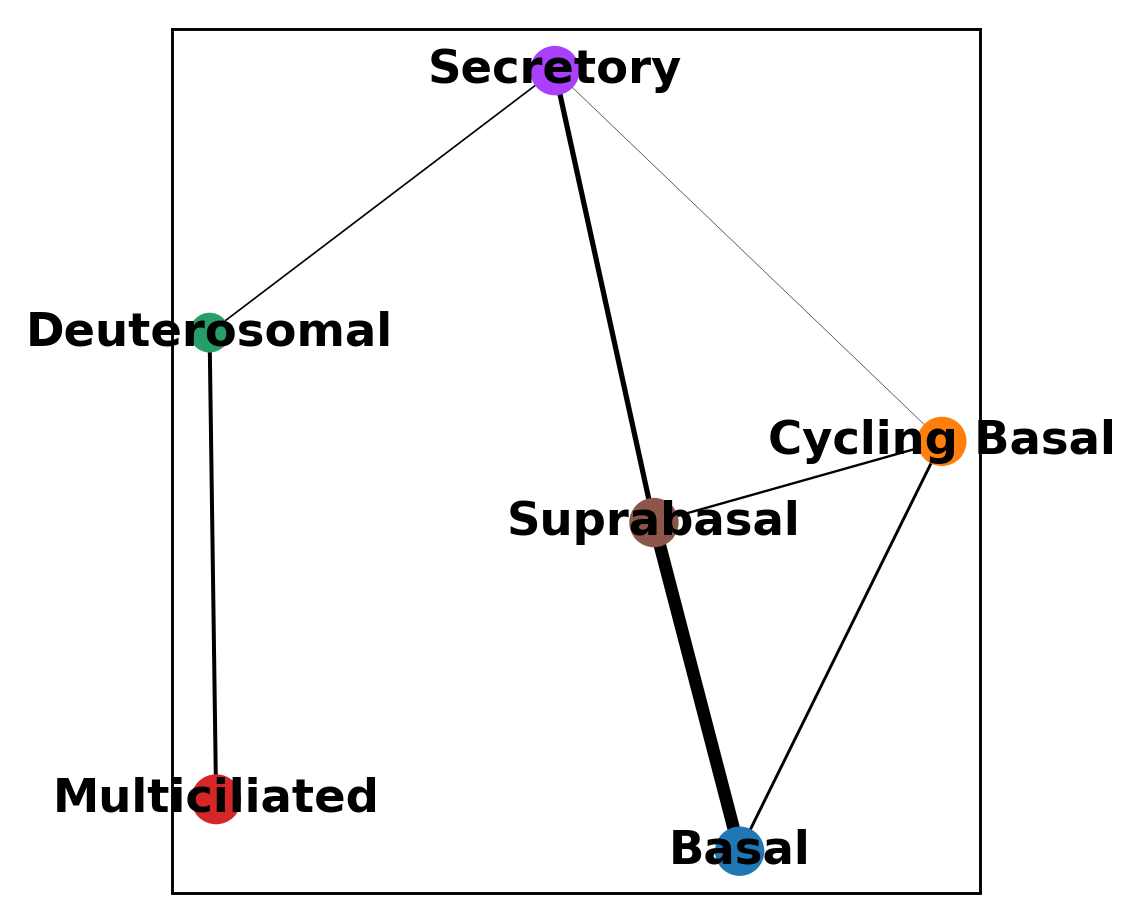

In [34]:
sc.pl.paga(adata)


In [35]:
sc.tl.draw_graph(adata, init_pos='paga')

drawing single-cell graph using layout "fa"
    finished (0:00:11.95) --> added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm)


In [36]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout "fa"
    finished (0:00:11.50) --> added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm)


saving figure to file ./figures/draw_graph_fapaga_bronchial.pdf


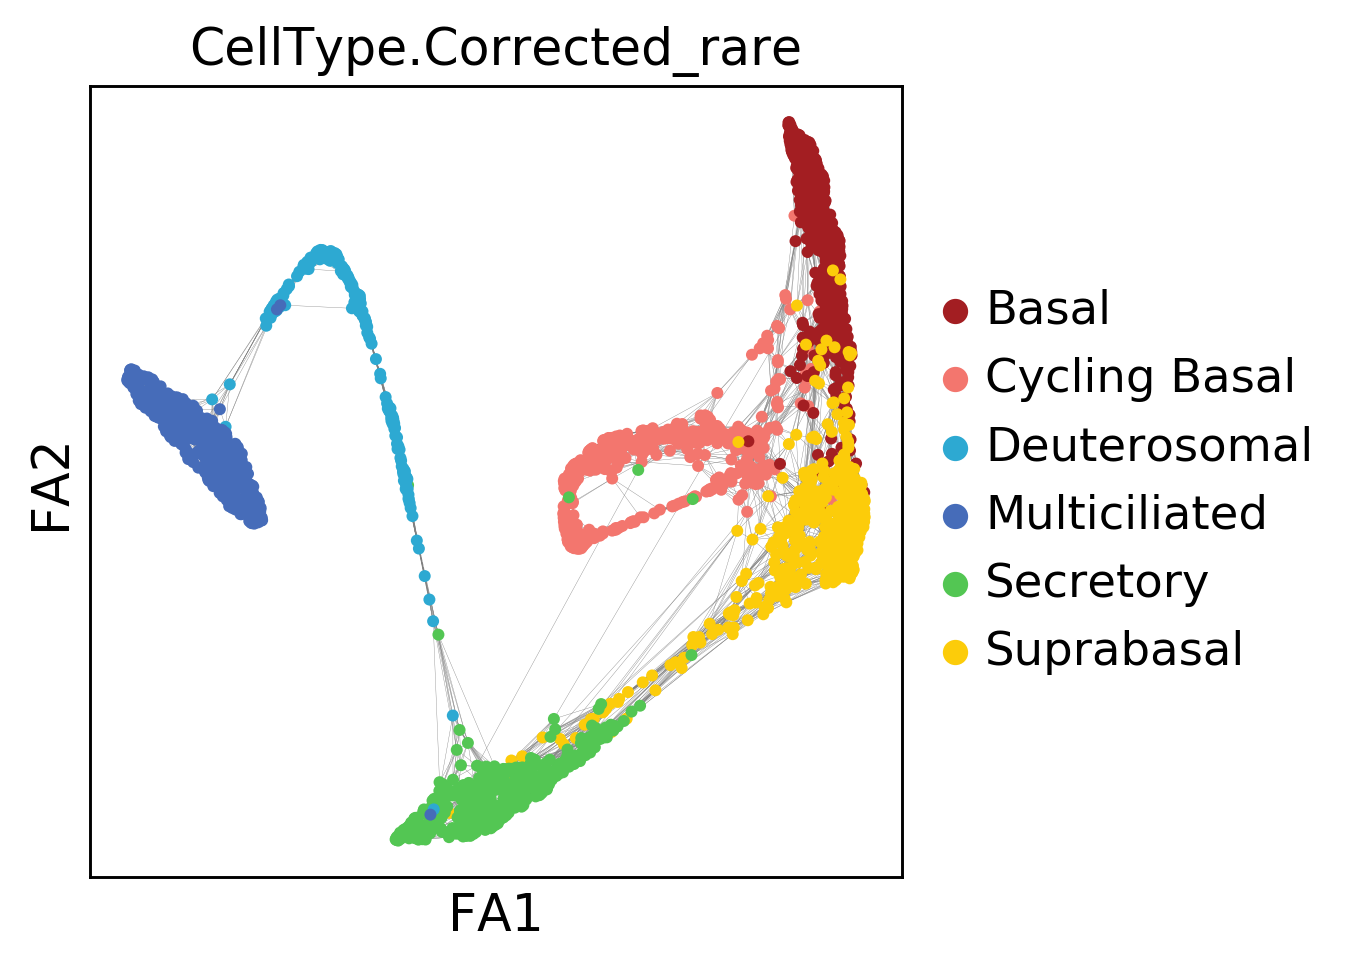

In [46]:
sc.pl.draw_graph(adata, color='CellType.Corrected_rare', edges = True, save = 'paga_bronchial.pdf')

saving figure to file ./figures/draw_graph_fapaga_bronchial_double.pdf


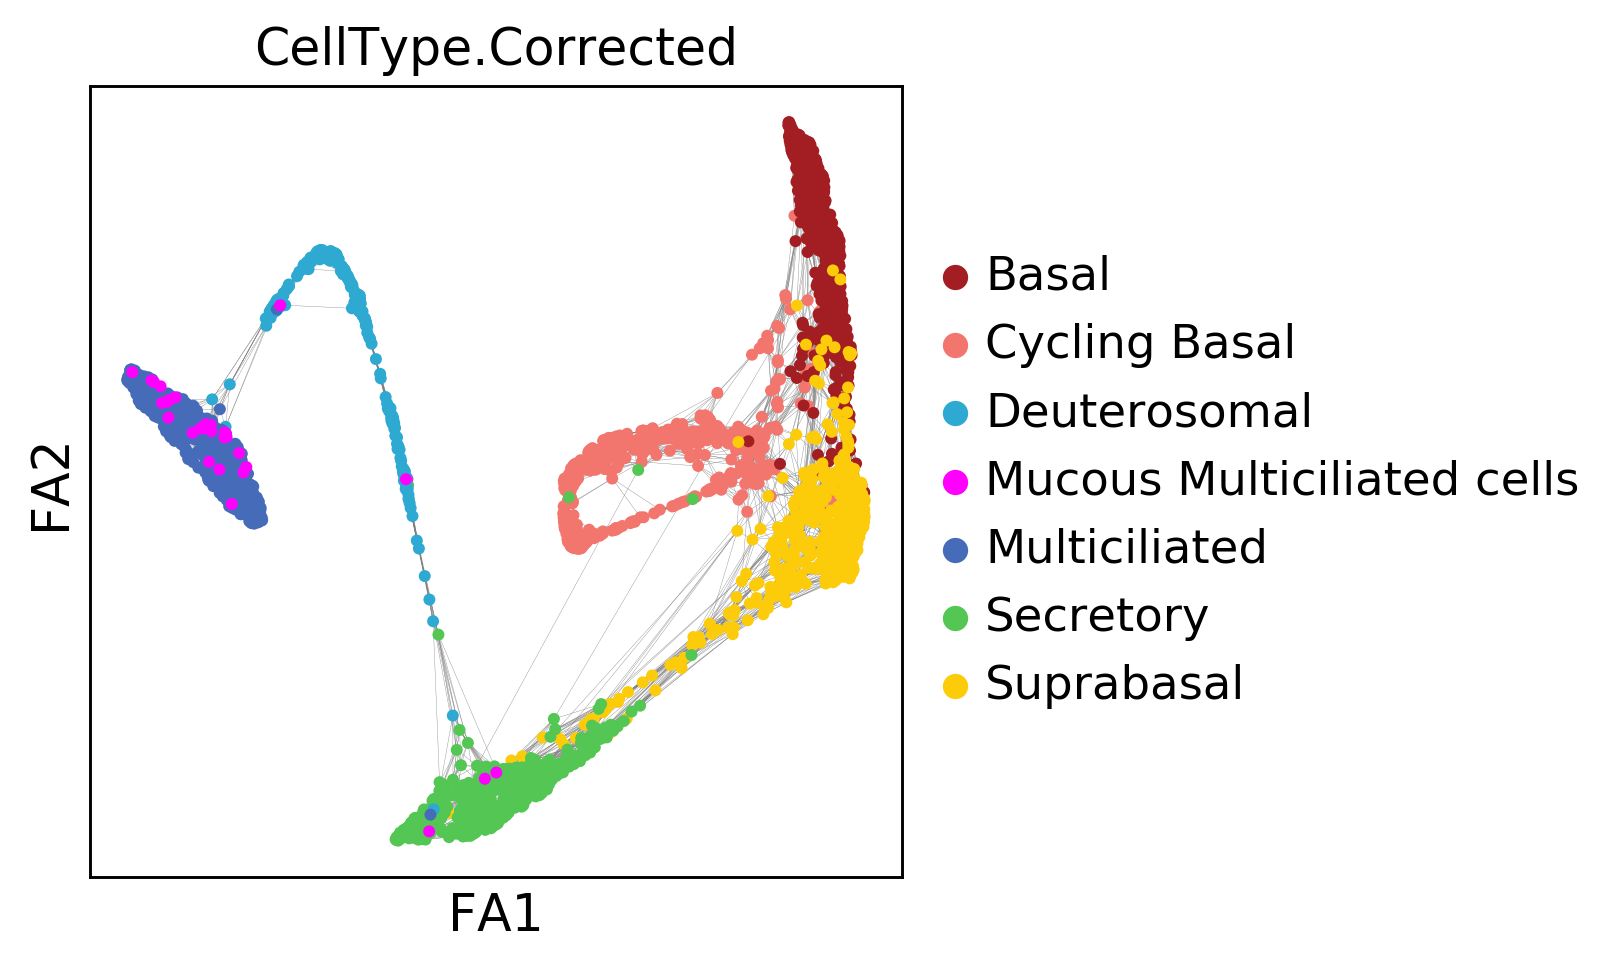

In [47]:
sc.pl.draw_graph(adata, color='CellType.Corrected', edges = True, save = 'paga_bronchial_double.pdf')

--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file ./figures/paga_comparepaga_bronchial_mix.pdf


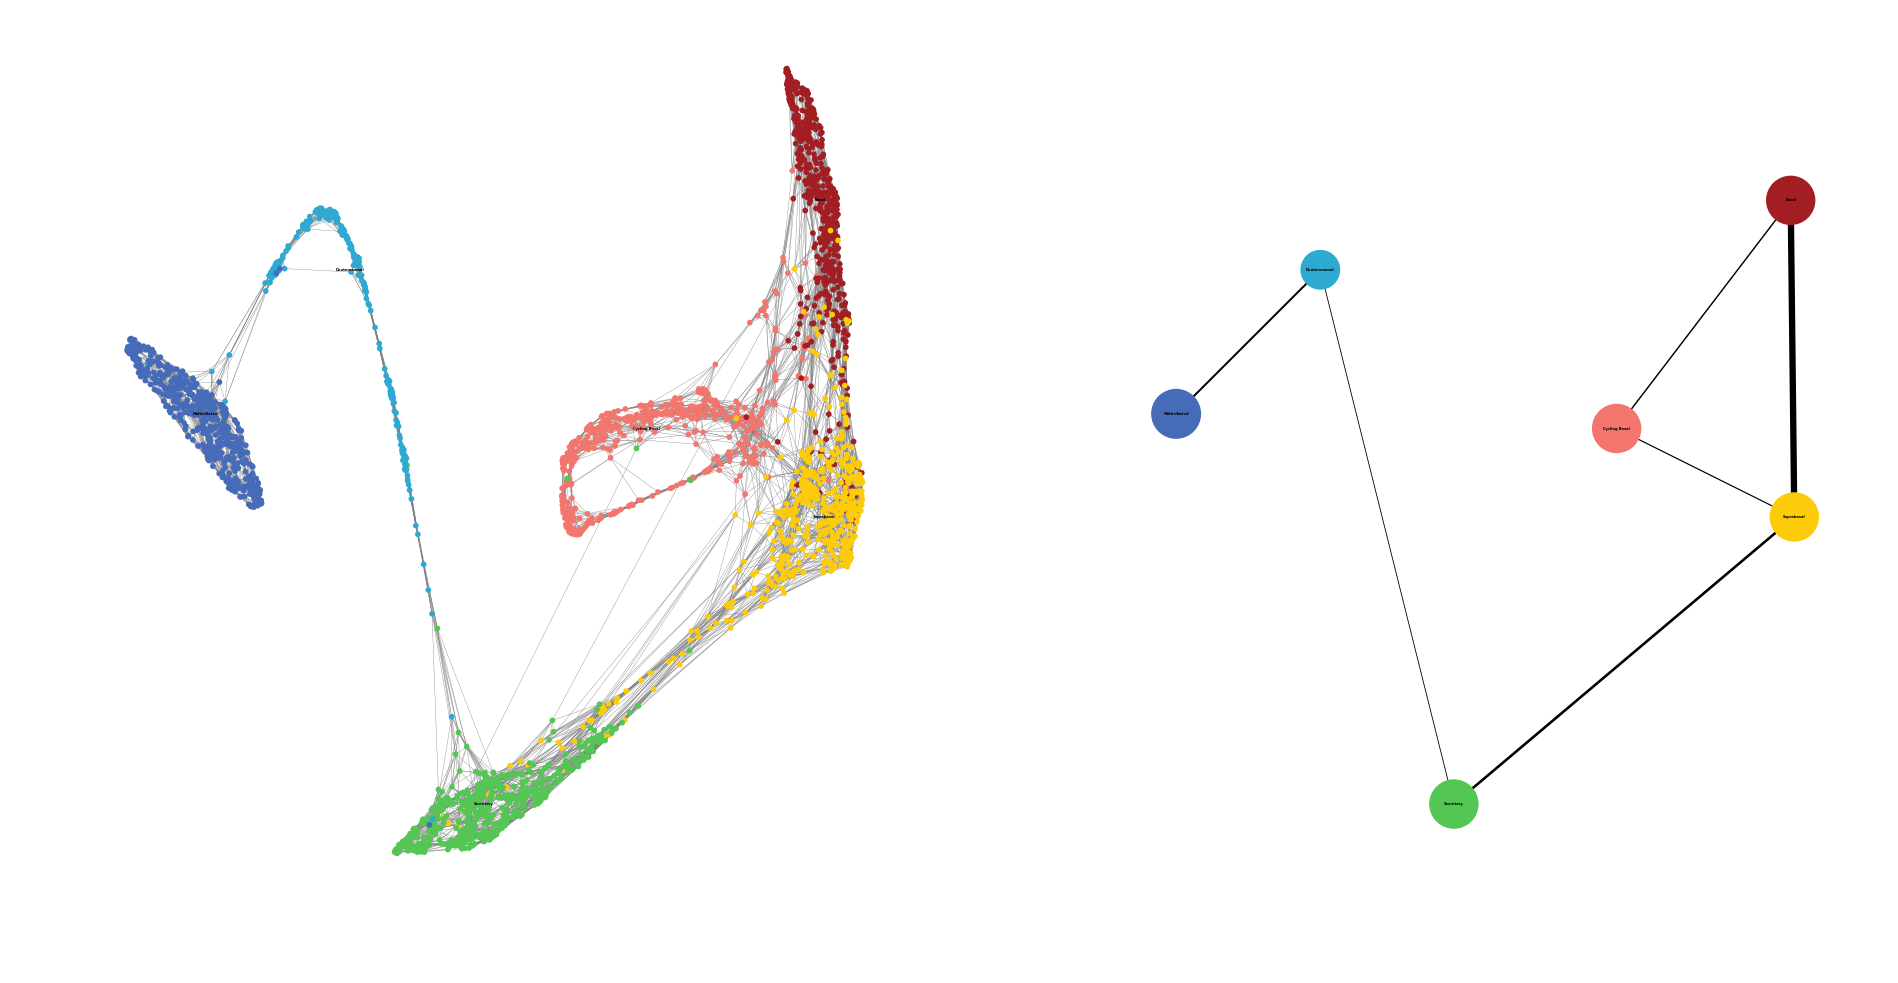

In [48]:
sc.pl.paga_compare(
    adata, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=0, fontsize=0, frameon=False, edges=True, save='paga_bronchial_mix.pdf')

In [49]:
adata.write('/Data/anndata_V6_Paga_bronchial_subset.h5ad')

In [45]:
adata.uns['CellType.Corrected_colors'] = [
                                '#A31E22',   #, Basal , 
                                '#F3766E',
                                '#2da9d2', # Deuterosomal
                                '#ff00ff', # Mucous Multiciliated cells
                                '#466cb9', # Multiciliated '#90a7d5',
                                '#53c653', # Secretory , '#a9c653'
                                '#FCCC0A'] # Suprabasal, '#e0c96c']



adata.uns['CellType.Corrected_rare_colors'] = [
                                '#A31E22',   #, Basal , 
                                '#F3766E',
                                '#2da9d2', # Deuterosomal
                                '#466cb9', # Multiciliated '#90a7d5',
                                '#53c653', # Secretory , '#a9c653'
                                '#FCCC0A'] # Suprabasal, '#e0c96c']

***
***

## Analysis of Nasal cells

In [121]:
cellsid = pd.read_csv('/Data/PAGA_subset_Nasal.txt', sep = '\t')


In [122]:
adata = adata_ann[cellsid['x'], ]
adata.shape

(1010, 18417)

In [123]:
sc.pp.filter_genes(adata, min_cells=10)
adata.X.shape

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


filtered out 4153 genes that are detected in less than 10 cells


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


(1010, 14264)

In [124]:
sc.tl.pca(adata, svd_solver='arpack')

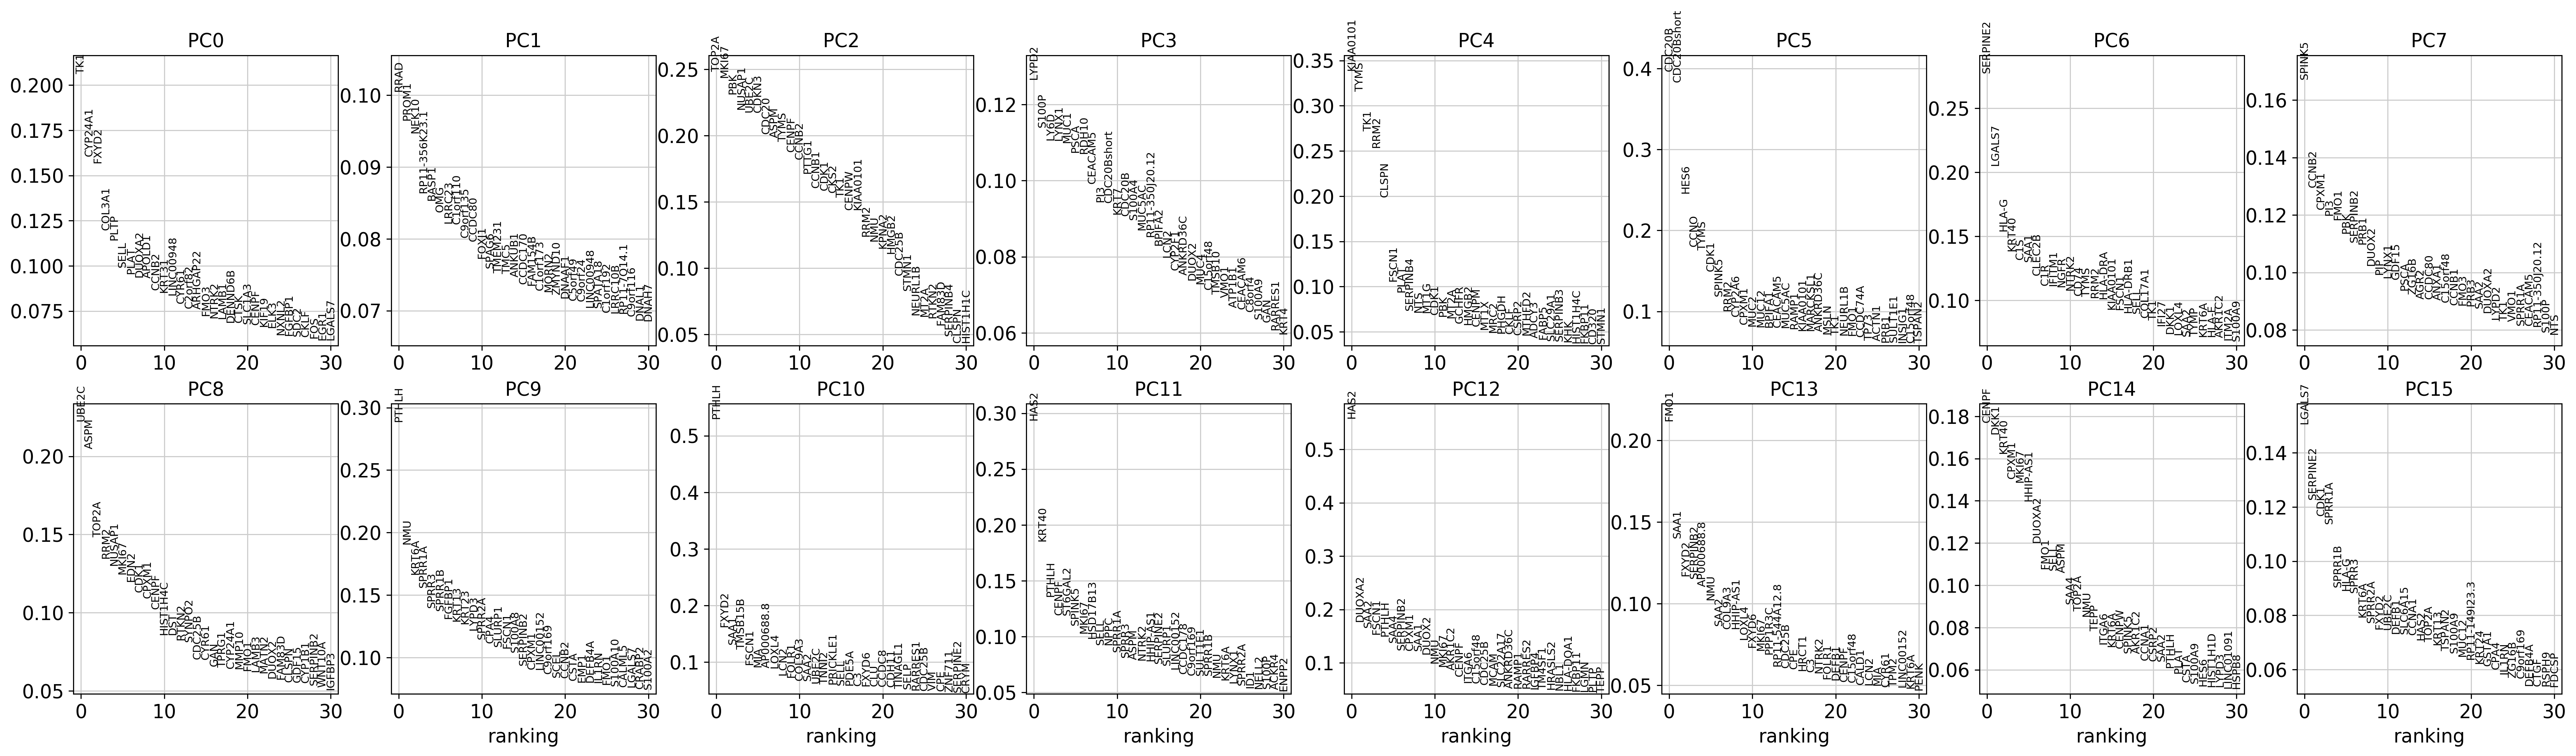

In [125]:
sc.pl.pca_loadings(adata, components=list(range(0,16)))

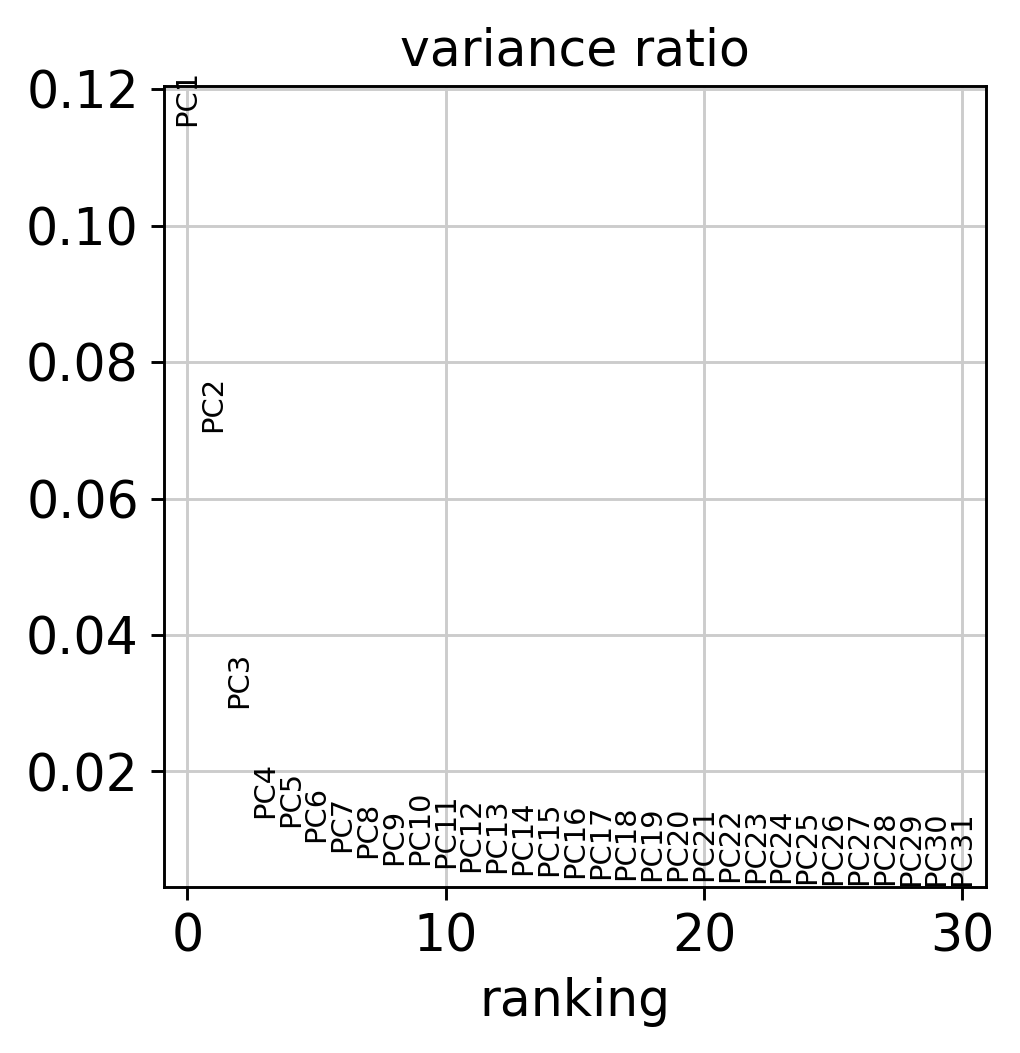

In [126]:
sc.pl.pca_variance_ratio(adata, log = False)

In [127]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=6)

computing neighbors
    using 'X_pca' with n_pcs = 6
    finished (0:00:00.10) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [128]:
sc.tl.umap(adata)

computing UMAP
    finished (0:00:01.91) --> added
    'X_umap', UMAP coordinates (adata.obsm)


... storing 'name' as categorical
... storing 'CellType.Corrected' as categorical
... storing 'CellType.Corrected_rare' as categorical


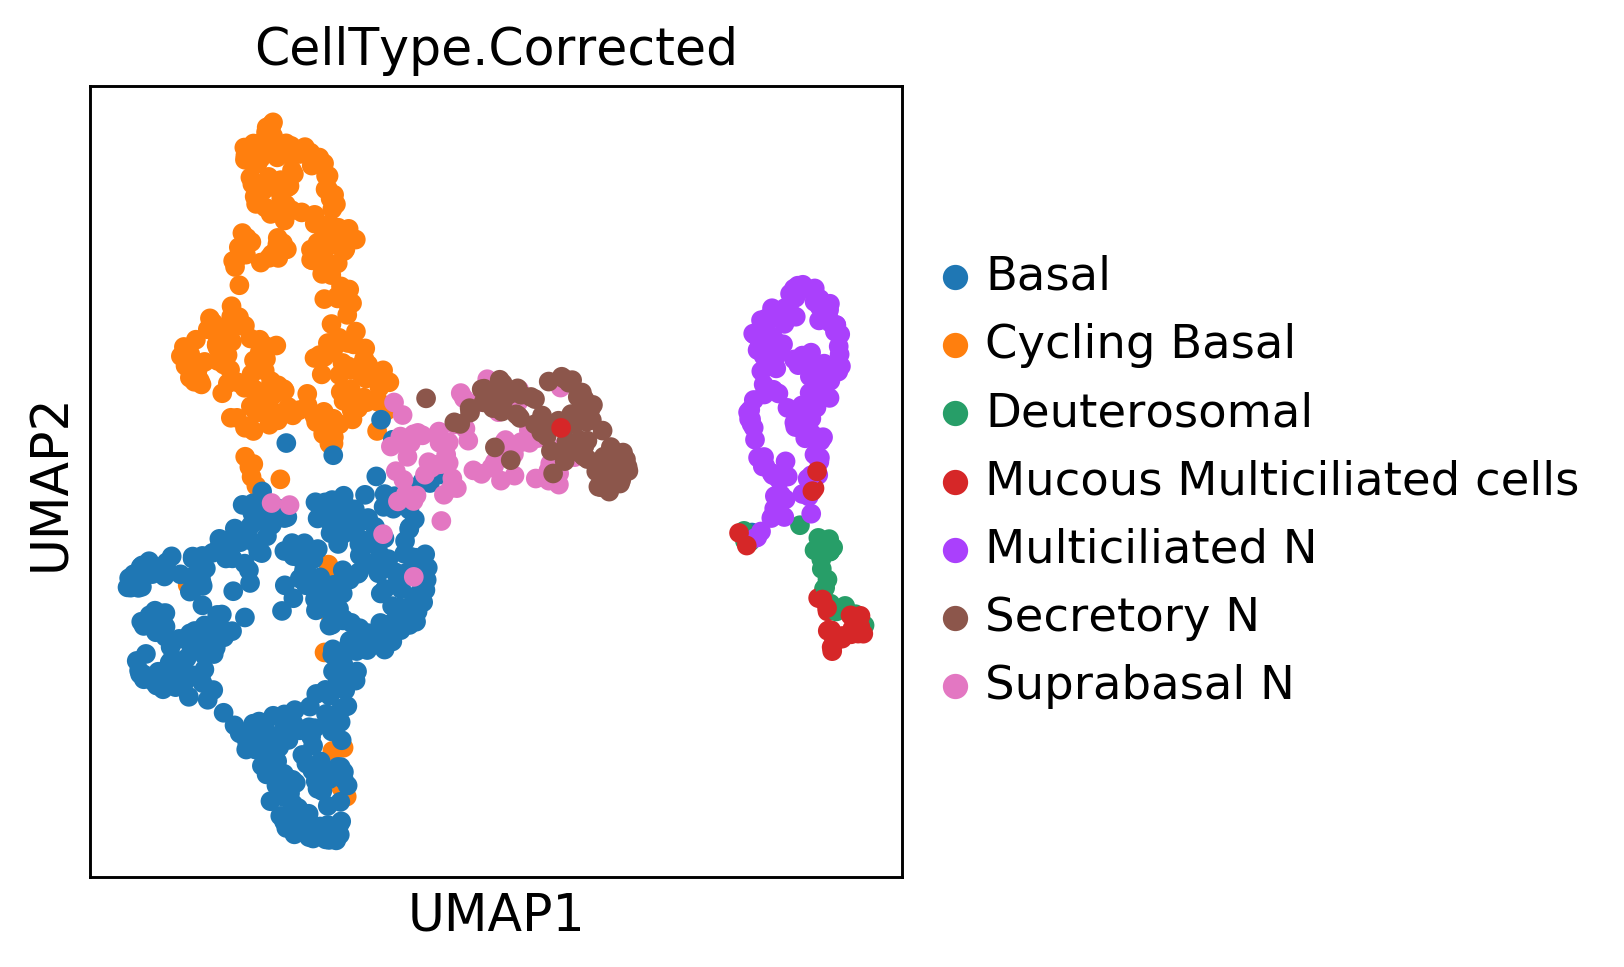

In [129]:
sc.pl.umap(adata, color=['CellType.Corrected'], edges = False)

In [130]:
sc.tl.paga(adata, groups='CellType.Corrected_rare')

running PAGA
    finished (0:00:00.03) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)


--> added 'pos', the PAGA positions (adata.uns['paga'])


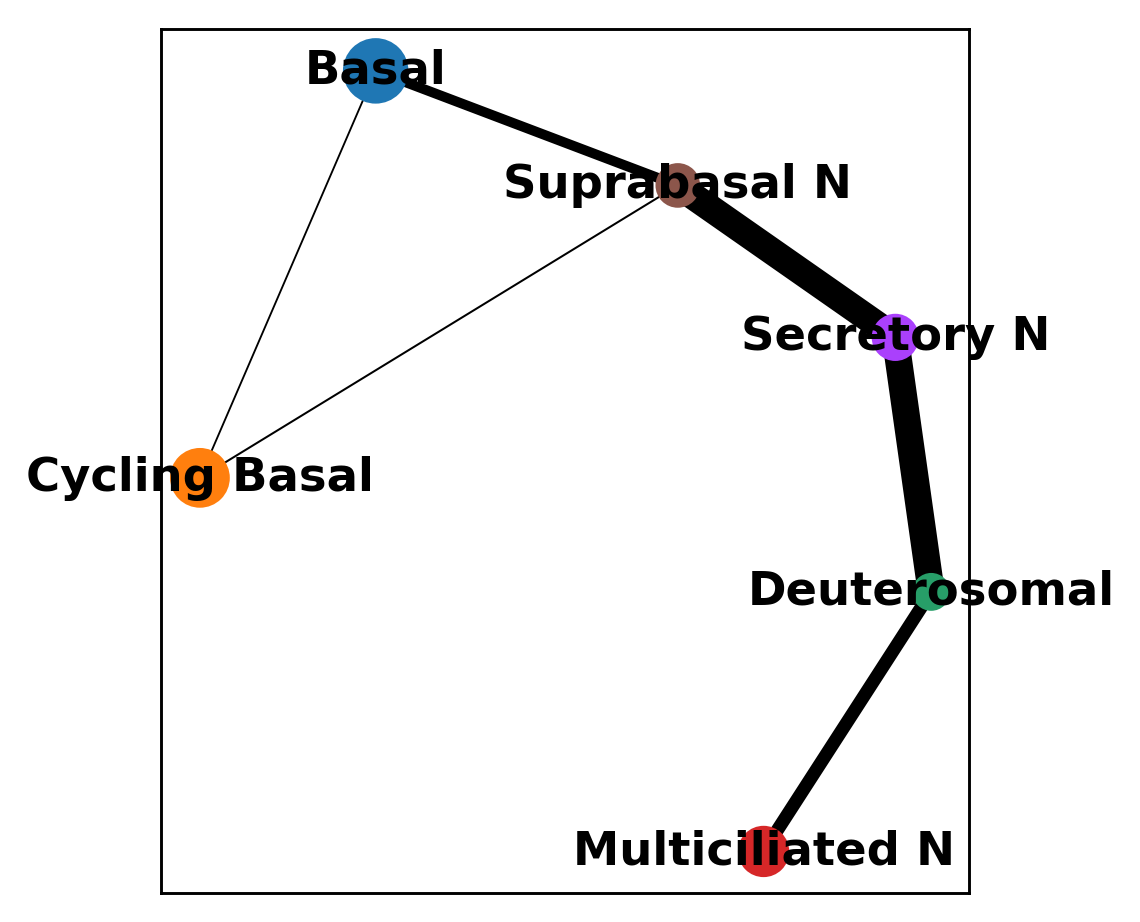

In [131]:
sc.pl.paga(adata)


In [132]:
sc.tl.draw_graph(adata, init_pos='paga')

drawing single-cell graph using layout "fa"
    finished (0:00:02.91) --> added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm)


In [133]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout "fa"
    finished (0:00:02.42) --> added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm)


saving figure to file ./figures/draw_graph_fapaga_nasal_double.pdf


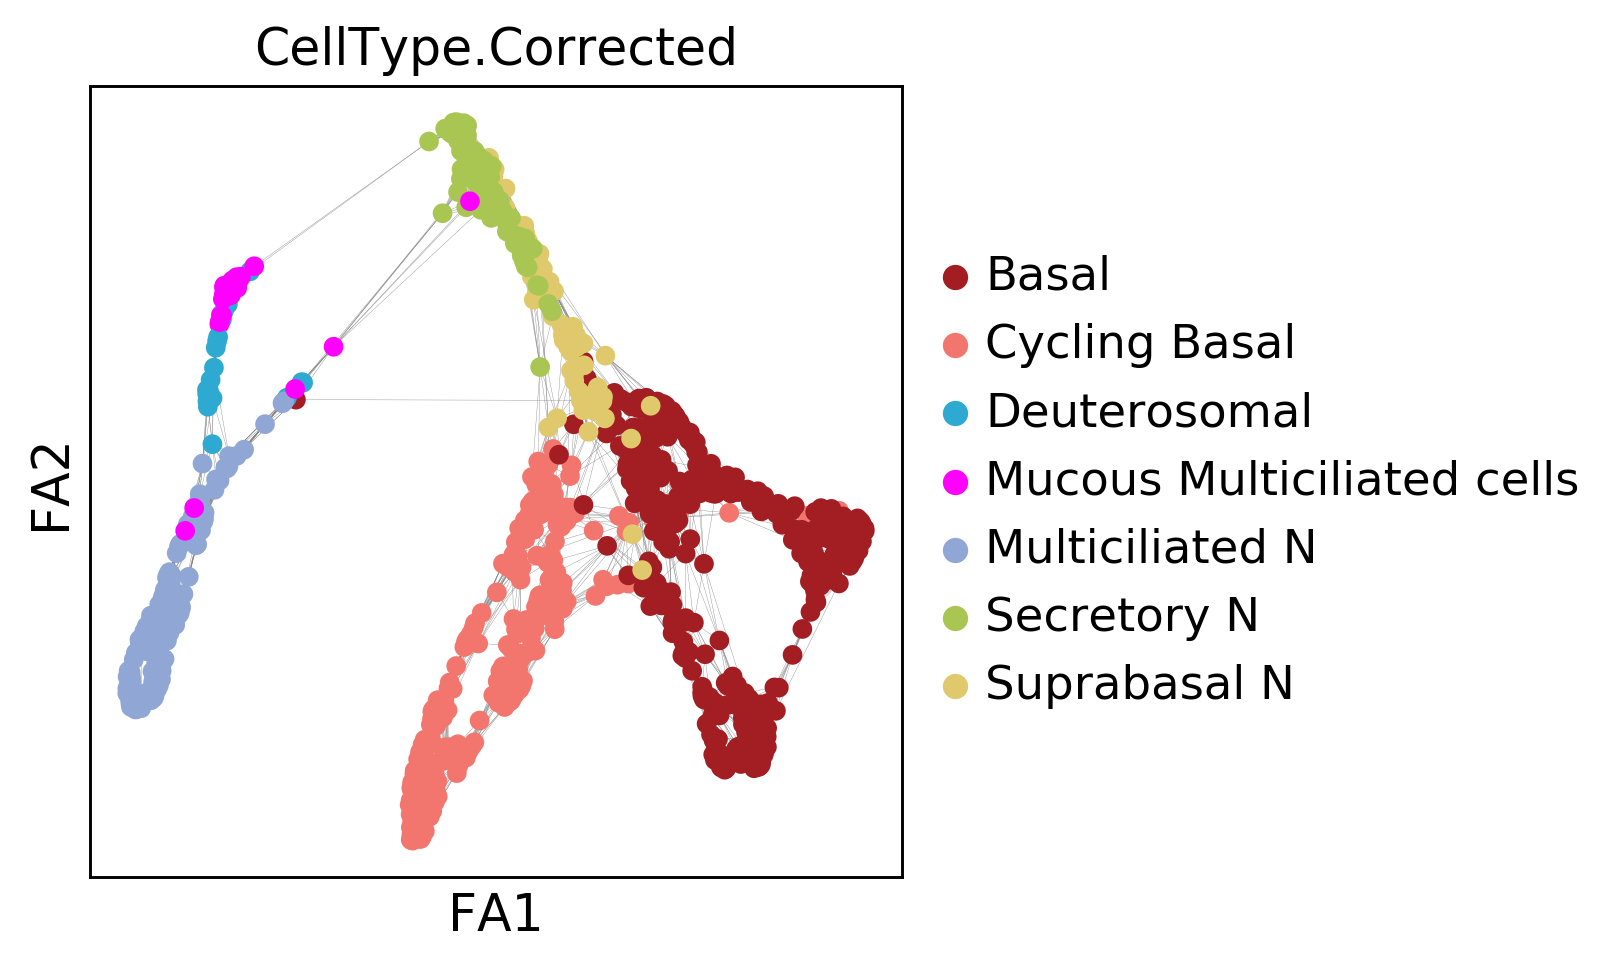

In [136]:
sc.pl.draw_graph(adata, color='CellType.Corrected', edges = True, save = 'paga_nasal_double.pdf')

saving figure to file ./figures/draw_graph_fapaga_nasal.pdf


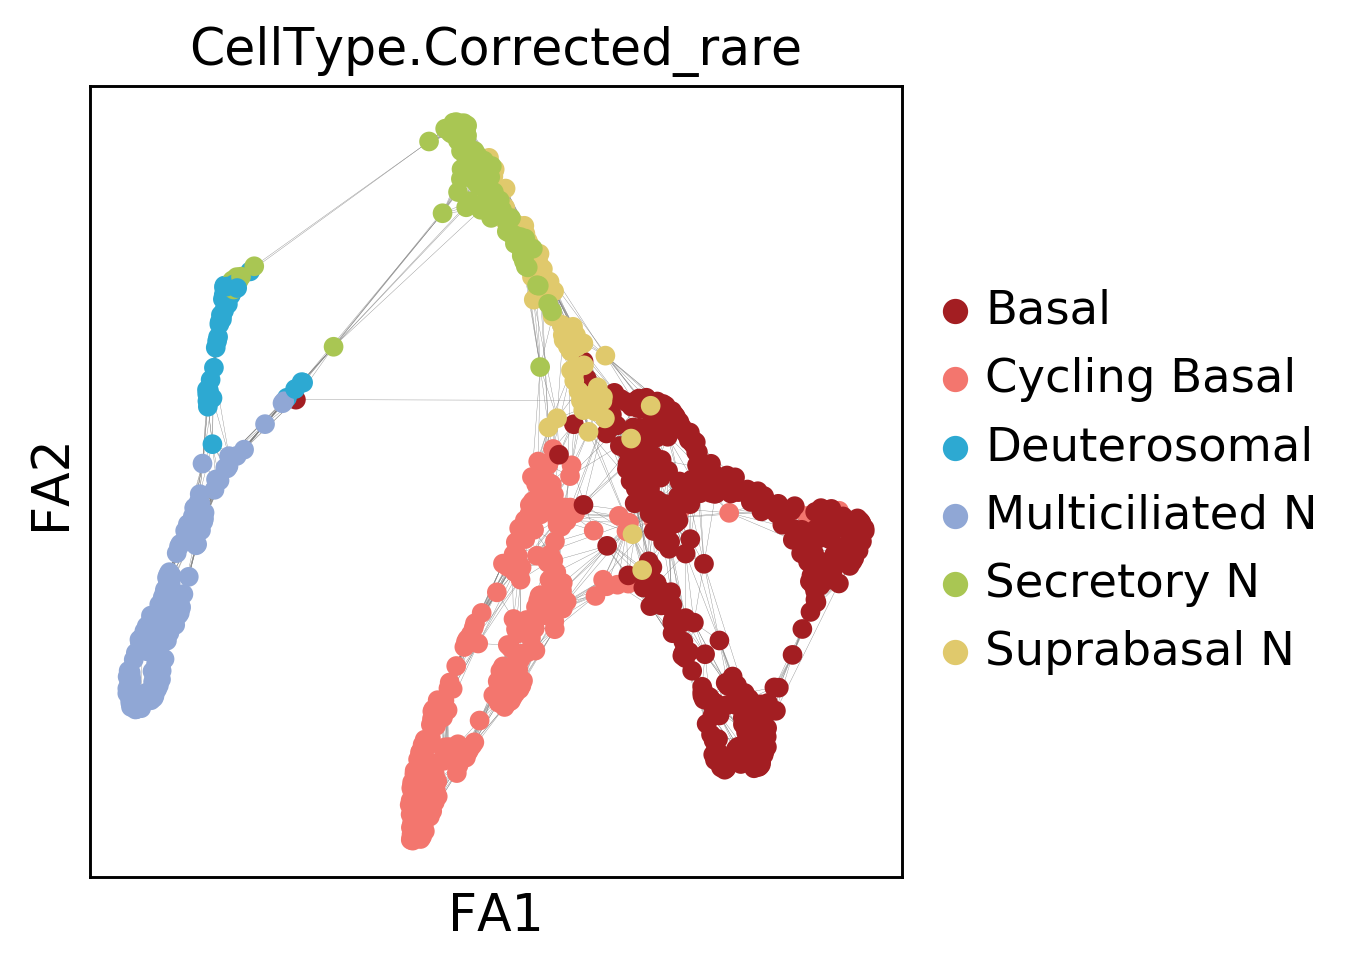

In [137]:
sc.pl.draw_graph(adata, color='CellType.Corrected_rare', edges = True, save = 'paga_nasal.pdf')

--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file ./figures/paga_comparepaga_nasal_mix.pdf


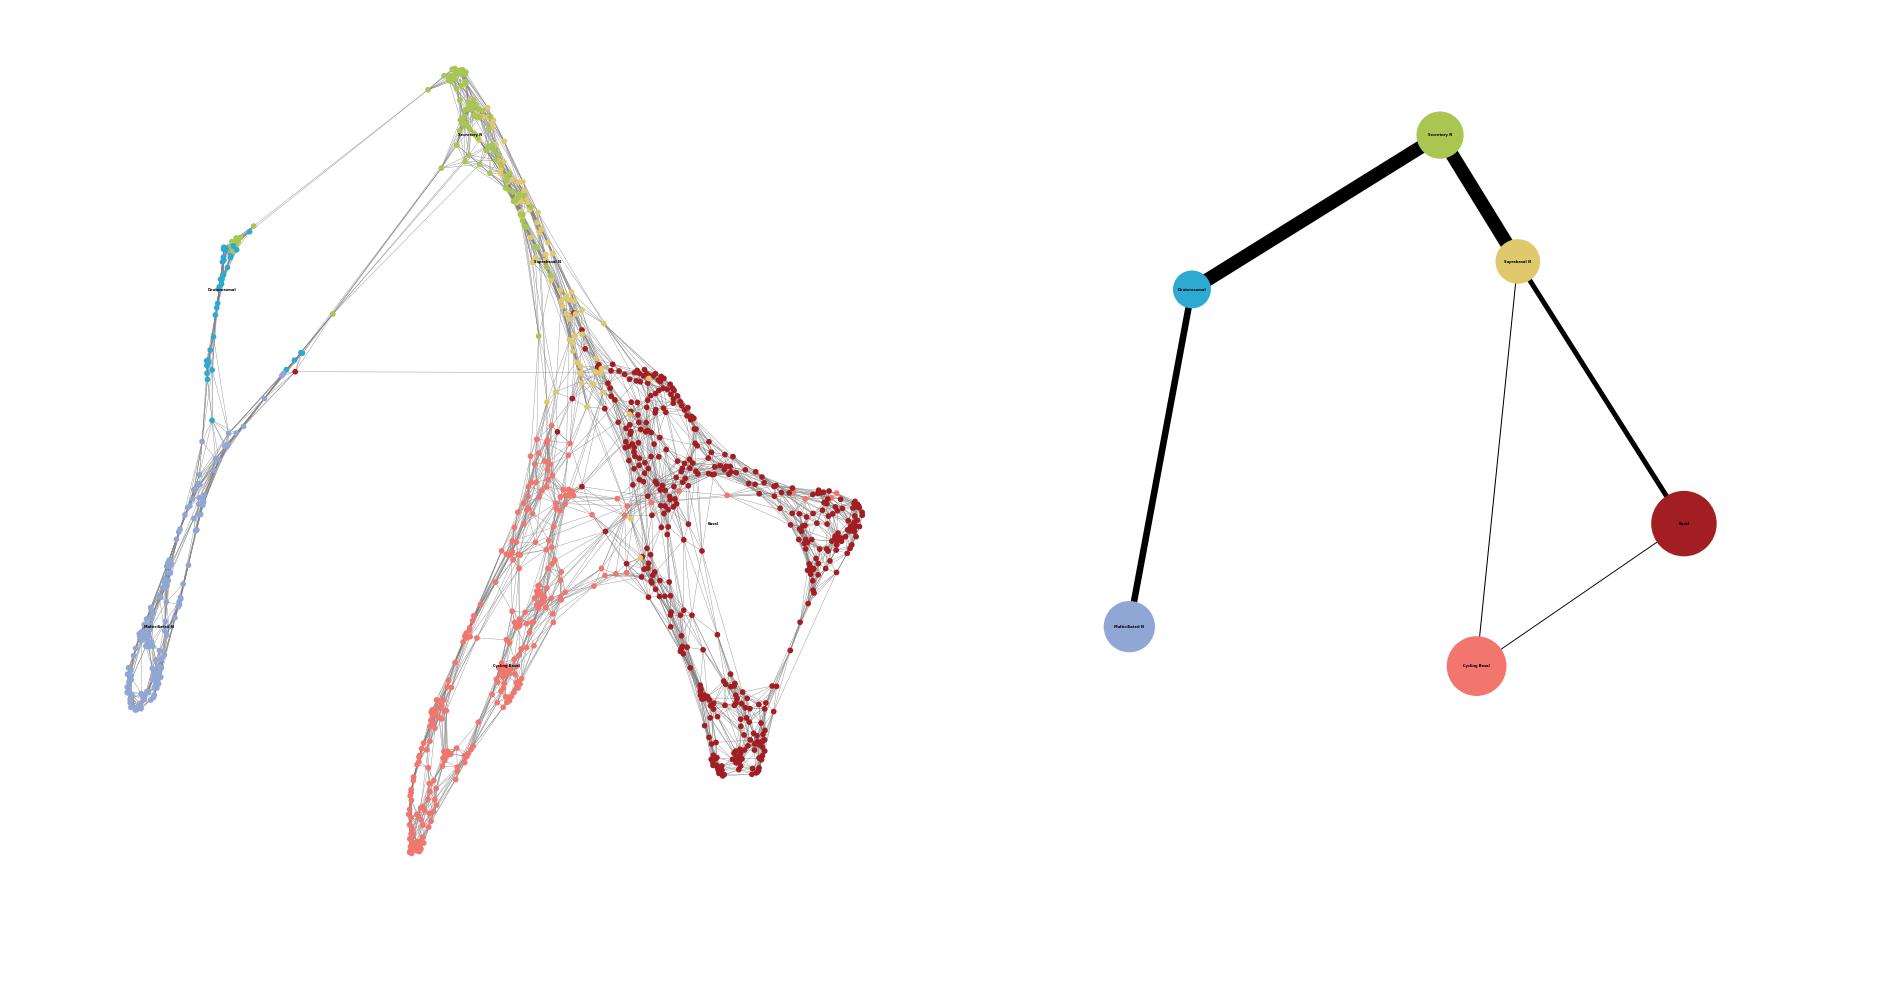

In [103]:
sc.pl.paga_compare(
    adata, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=0, fontsize=0, frameon=False, edges=True, save = 'paga_nasal_mix.pdf')

In [105]:
adata.write('/Data/anndata_V6_Paga_nasal_subset.h5ad')